In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams["figure.figsize"] = (8.0, 10.0)

In [2]:
data_dir  = "../data/coco"
data_type = "train2017"
ann_file  = "{}/annotations/instances_{}.json".format(data_dir, data_type)

# Initialize COCO api for instance annotations
coco = COCO(ann_file)

loading annotations into memory...
Done (t=18.65s)
creating index...
index created!


In [3]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat["name"] for cat in cats]
print("COCO categories: \n{}\n".format(" ".join(nms)))

nms = set([cat["supercategory"] for cat in cats])
print("COCO supercategories: \n{}".format(" ".join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
furniture vehicle outdoor appliance accessory food indoor animal sports electronic person kitchen


In [4]:
imgIds = set()
catIds = coco.getCatIds()[:10]
for catId in catIds:
    for imgId in coco.getImgIds(catIds=[catId])[:700]:
        imgIds.add(imgId)
imgIds = list(imgIds)

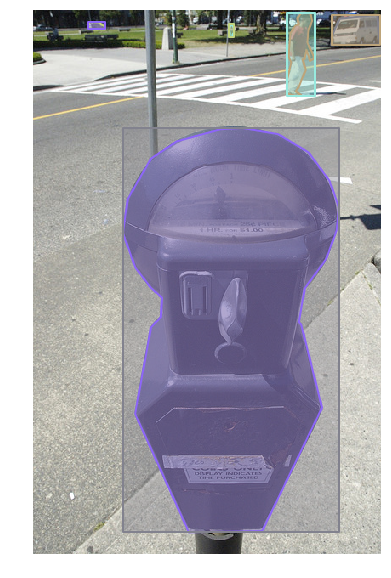

In [29]:
# load and display image
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
I = io.imread(os.path.join(data_dir, data_type, img["file_name"]))

# load and display instance annotations
plt.imshow(I); plt.axis("off")
annIds = coco.getAnnIds(imgIds=img["id"], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, show_bbox=True)

In [50]:
print(len(anns))
print(anns[0].keys())
print(anns[0]["category_id"])
print(anns[0]["id"])

catName = coco.loadCats([anns[0]["category_id"]])[0]
print(catName["name"])

5
dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
14
419406
parking meter


In [39]:
catIds = coco.getCatIds()[:10]
print(catIds)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches
import os
import tensorflow as tf
from pycocotools.coco import COCO

c:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


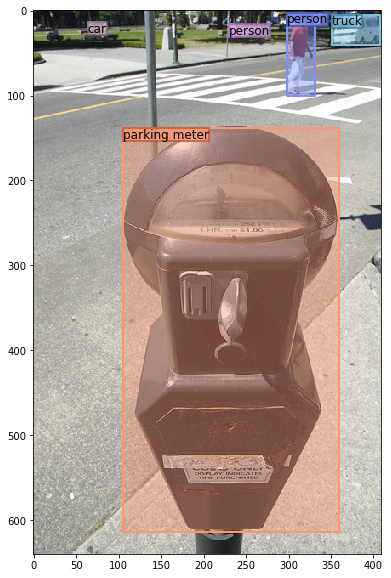

In [82]:
def plot_bboxes(image, bboxes, labels):
    fig, ax = plt.subplots(1, figsize=(8.0, 10.0))
    plt.imshow(image)

    rectangles = []
    color = []
    for bbox, label in zip(bboxes, labels):
        xmin, ymin, xmax, ymax = bbox
        rectangles.append(patches.Rectangle((xmin, ymin), xmax, ymax))
        color.append((np.random.random((1, 3))*0.6+0.4).tolist()[0])
        
        cat_name = coco.loadCats([label])[0]["name"]
        ax.text(xmin, ymin, cat_name, fontsize=12,
                horizontalalignment='left',
                verticalalignment='top',color="black",
                bbox={'facecolor':color[-1], "edgecolor": [x-0.25 for x in color[-1]], "linewidth": 2.0, 'alpha':0.75, 'pad':0})

    p = PatchCollection(rectangles, facecolor=color, linewidths=0, alpha=0.4)
    ax.add_collection(p)
    p = PatchCollection(rectangles, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p)

    plt.show()
    
annIds = coco.getAnnIds(imgIds=img["id"], iscrowd=None)
anns = coco.loadAnns(annIds)
image = io.imread(os.path.join(data_dir, data_type, img["file_name"]))
bboxes = []
labels = []
for ann in anns:
    bboxes.append(ann["bbox"])
    labels.append(ann["category_id"])
plot_bboxes(image, bboxes, labels)